In [1]:
import numpy as np
from functools import partial
import pandas as pd
#import matplotlib as mpl
#mpl.rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

import sys
sys.path.append('../python/')
import EdwRes

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 22
       }

xtick = {'direction' : 'in',
         'top' : 'True',
         'major.size' : '8',
         'major.width' : '1.2'}

ytick = {'direction' : 'in',
         'right' : 'True',
         'major.size' : '8',
         'major.width' : '1.2',
         'minor.size' : '5'}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', **xtick)
matplotlib.rc('ytick', **ytick)

In [2]:
#file = "../CDMS_data/yieldhisto_bin11_det1_precoiltNF_ytNF_0.txt"
file = "../CDMS_data/hist_bin_130keV_final.tsv"
data = pd.read_csv(file, skiprows=1, header=None, delim_whitespace=True)

print (data.head(5))
list(data.columns.values)
x = data[5]
y = data[6]

#x = data[0]
#y = data[1]

   0    1   2   3   4      5        6
0  1  0.0  51  51  51  0.965   73.973
1  2  0.0  51  51  51  0.981   82.193
2  3  0.0  51  51  51  0.981  221.918
3  4  0.0  51  51  51  0.994  221.918
4  5  0.0  51  51  51  0.994  961.644


18


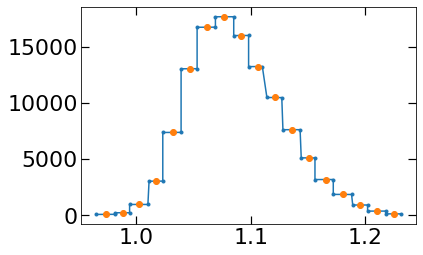

In [3]:
plt.plot(x,y,'.-')
#plt.xlim(-0.2,1.4)
bin_widths = np.diff(x)
width = np.mean(np.sort(bin_widths[bin_widths > 0.01]))
width = 0.01482
offset = 0.973
x_center2 = np.arange(0,17.5*width, width) + offset
print (len(x_center2))
plt.plot(x_center2, y[::2],'o')

bin_centers = x_center2
counts = y[::2]

In [4]:
#define a Gaussian 
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#do a fit
from scipy.optimize import curve_fit
from scipy.stats import moment

#ysig = np.mean(counts)
ymax = np.max(counts)

popt, pcov = curve_fit(gaus,bin_centers,counts,p0=[ymax, np.mean(bin_centers), 0.1])

print(popt)
print(pcov)

"""
# probably a bad idea to use skewedness!
# higher moments depend a *lot* on sample size
ymean = popt[1]
ysig = abs(popt[2])
c = 3
momentdata = data[data['bin'] == bin_num][1]
momentdata = momentdata[(momentdata > ymean - c*ysig) & (momentdata < ymean + c*ysig)]
print ("moment:", moment(momentdata, moment=1), moment(momentdata, moment=2), moment(momentdata, moment=3)/ysig**3, moment(momentdata, moment=4))
"""

[1.74620677e+04 1.08250667e+00 3.97864156e-02]
[[ 3.52477203e+05  3.77675899e-04 -5.36203892e-01]
 [ 3.77675899e-04  2.43878893e-06 -1.92304624e-09]
 [-5.36203892e-01 -1.92304624e-09  2.44401218e-06]]


'\n# probably a bad idea to use skewedness!\n# higher moments depend a *lot* on sample size\nymean = popt[1]\nysig = abs(popt[2])\nc = 3\nmomentdata = data[data[\'bin\'] == bin_num][1]\nmomentdata = momentdata[(momentdata > ymean - c*ysig) & (momentdata < ymean + c*ysig)]\nprint ("moment:", moment(momentdata, moment=1), moment(momentdata, moment=2), moment(momentdata, moment=3)/ysig**3, moment(momentdata, moment=4))\n'

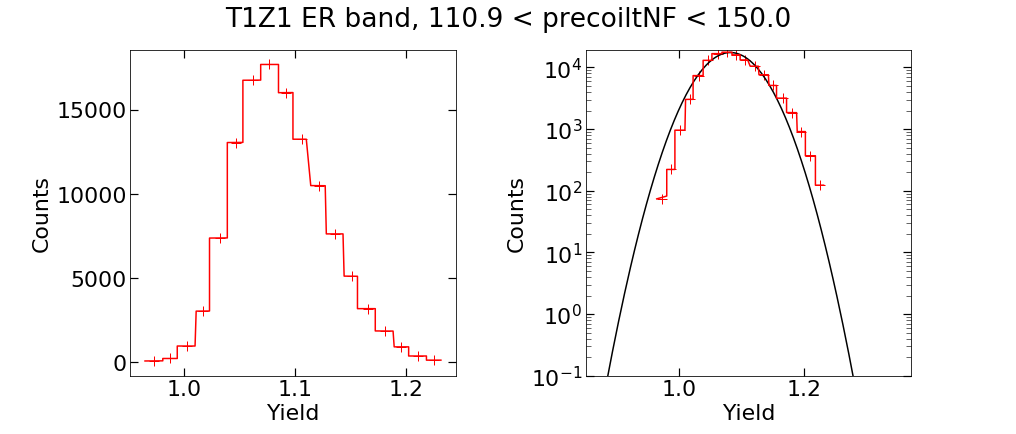

In [23]:
X = np.linspace(0.9*min(bin_centers), max(bin_centers*1.1),150)
fit = gaus(X,*popt)

ymin = 0.1
ymax = np.max(counts) * 1.1
fig,axes = plt.subplots(1,2,figsize=(14,6), constrained_layout=True)
fig.suptitle("T1Z1 ER band, 110.9 < precoiltNF < 150.0")
plt.subplots_adjust(wspace = 0.4)
ax1 = axes[1]
ax1.set_yscale('log')
ax1.set_ylim(ymin, ymax)
step, = ax1.plot(bin_centers, counts, 'r+', markersize=10)
ax1.set_ylabel("Counts")
ax1.set_xlabel("Yield")
#ax1.set_title("{:d} to {:d} keV, {:d} total counts".format(x_min, x_max, len(fitdata)))
ax1.plot(X,fit,'k-',label='fit')
ax1.plot(x,y,'r-')

ax2 = axes[0]
ax2.plot(x,y,'r-')
ax2.plot(x_center2, y[::2],'r+', markersize=10)
ax2.set_ylabel("Counts")
ax2.set_xlabel("Yield")

plt.show()

if True:
    fig.savefig('T1Z1_ER_band_120keV_fit.svg', format="svg")